In [2]:
!pip install pytesseract

  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
  Using cached packaging-23.2-py3-none-any.whl (53 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.1.0 requires opencv-python-headless>=4.1.1, which is not installed.
spacy 3.4.1 requires pydantic!=1.8,!=1.8.1,<1.10.0,>=1.7.4, but you have pydantic 1.10.13 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install transformers

     -------------------------------------- 143.8/143.8 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.5
    Uninstalling urllib3-2.0.5:
      Successfully uninstalled urllib3-2.0.5



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install nms

  Using cached nms-0.1.6-py3-none-any.whl (11 kB)



[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# load image from the IAM dataset
url = "https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

Downloading: 100%|██████████| 228/228 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 1.09k/1.09k [00:00<00:00, 1.12MB/s]
Downloading: 100%|██████████| 878k/878k [00:00<00:00, 2.48MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 2.19MB/s]
Downloading: 100%|██████████| 772/772 [00:00<?, ?B/s] 
Downloading: 100%|██████████| 4.07k/4.07k [00:00<?, ?B/s]
Downloading: 100%|██████████| 1.24G/1.24G [04:12<00:00, 5.28MB/s]
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
C

AttributeError: module 'numpy' has no attribute 'object'

In [3]:
model

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): PatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0): ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, 

In [ ]:
generated_text

# Tesseract with rotation and NMS

In [1]:
from PIL import Image
from pytesseract import Output
import pytesseract
import numpy as np 
import cv2
import os
import matplotlib.pyplot as plt
import imutils
import copy
from nms import nms
import math
from scipy.ndimage import interpolation as inter


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

C:\Users\kajud\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pytesseract.__version__

'0.3.10'

In [3]:
filenames = os.listdir("testfiles")

In [4]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [304]:
img_idx = -30
denoising = True
thresholding = True
resize_factor = 2
filename = f'testfiles/{filenames[img_idx]}'

img = cv2.imread(filename)
brightness = np.mean(img)
img = cv2.resize(img, (img.shape[1]*resize_factor, img.shape[0]*resize_factor))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, img = cv2.threshold(img, 250, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU) #imgf contains Binary image
# plt.imshow(img)
height, width = img.shape[:2]
centerX, centerY = (width // 2, height // 2)
if denoising:
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
print(brightness)
if brightness < 100:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    lower_blue = np.array([110,50,50]) 
    upper_blue = np.array([130,255,255]) 

    # Here we are defining range of bluecolor in HSV 
    # This creates a mask of blue coloured  
    # objects found in the frame. 
    mask = cv2.inRange(hsv, lower_blue, upper_blue) 

    # The bitwise and of the frame and mask is done so  
    # that only the blue coloured objects are highlighted  
    # and stored in res 
    img = cv2.bitwise_and(img,img, mask= mask) 
    thresholding = True

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold the image using Otsu's thresholding method
if thresholding:
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# threshold_C = 10
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,threshold_C)

all_res = {}
for angle in range(-45,45,5):
    image = copy.deepcopy(img)
    M = cv2.getRotationMatrix2D((centerX, centerY), angle, 1.0)
    image = cv2.warpAffine(image, M, (width, height))

    results = pytesseract.image_to_data(image, output_type=Output.DICT)
    all_res[angle] = {"left": [], "top": [], "height": [], "width": [], "conf": [], "text": []}
    for i in range(0, len(results["text"])):
        x = results["left"][i]
        y = results["top"][i]

        w = results["width"][i]
        h = results["height"][i]

        text = results["text"][i]
        conf = int(results["conf"][i])

        if conf > 80:
            text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
            if text != "" and len(text) > 1:
                all_res[angle]["left"].append(x//resize_factor)
                all_res[angle]["top"].append(y//resize_factor)
                all_res[angle]["width"].append(w//resize_factor)
                all_res[angle]["height"].append(h//resize_factor)
                all_res[angle]["conf"].append(conf)
                all_res[angle]["text"].append(text)

# visszatranszformálás és nms

252.18448170498817


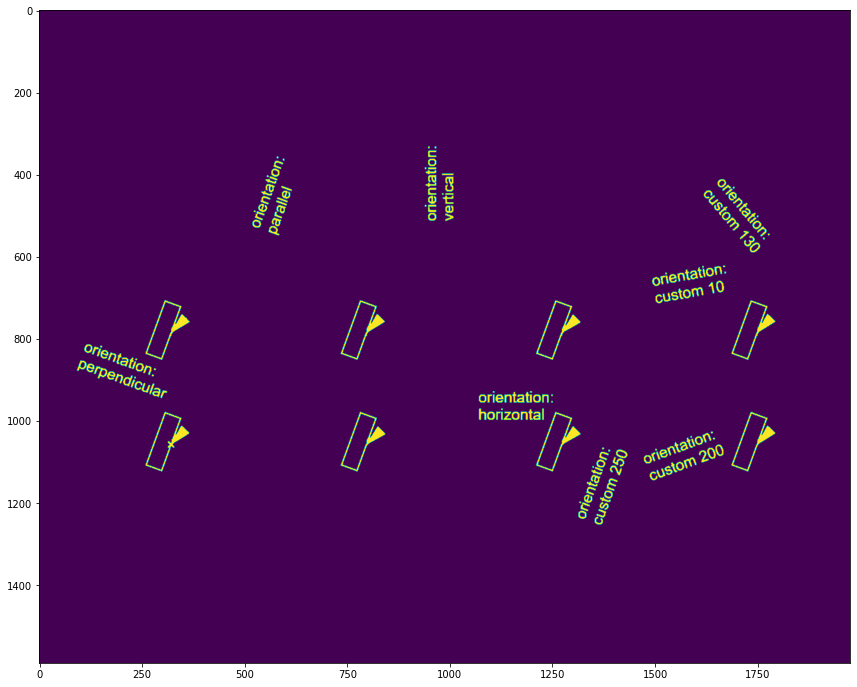

In [305]:
filename = f'testfiles/{filenames[img_idx]}'
img = cv2.imread(filename)
brightness = np.mean(img)
img = cv2.resize(img, (img.shape[1]*resize_factor, img.shape[0]*resize_factor))
# if brightness < 100:

# morph_kernel = np.ones((5,5))
# dilated = cv2.dilate(gray, kernel=morph_kernel)
# textmask = (dilated >= 0.15)
# enhanced = gray / dilated
# enhanced[~textmask] = gray[~textmask]
# output = 1- enhanced
# gray = output * 255

# else:
#     # threshold the image using Otsu's thresholding method
# gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# gray = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,threshold_C)
if denoising:
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
# img[:,:,2] = img[:,:,2] * 30
# img[:,:,1] = img[:,:,1] * 3
# img[:,:,2] = img[:,:,2] * 3
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# threshold_C = 4
# img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,threshold_C)
# img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

if brightness < 100:
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    lower_blue = np.array([110,50,50]) 
    upper_blue = np.array([130,255,255]) 

    # Here we are defining range of bluecolor in HSV 
    # This creates a mask of blue coloured  
    # objects found in the frame. 
    mask = cv2.inRange(hsv, lower_blue, upper_blue) 

    # The bitwise and of the frame and mask is done so  
    # that only the blue coloured objects are highlighted  
    # and stored in res 
    img = cv2.bitwise_and(img,img, mask= mask) 

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

if thresholding:
    img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

plt.figure(figsize=(20,12))
plt.imshow(img)

[[265.5858  266.72794]
 [254.27206 255.41422]
 [268.4142  241.27206]
 [279.72794 252.58578]]
[[810.18195 545.27386]
 [784.72614 519.818  ]
 [803.81805 500.72614]
 [829.27386 526.182  ]]
[[819.6773  347.8427 ]
 [812.91547 333.3418 ]
 [828.3227  326.1573 ]
 [835.08453 340.6582 ]]
[[807.7863 552.5898]
 [801.0245 538.0888]
 [828.2137 525.4102]
 [834.9755 539.9112]]
[[754.6993 366.4865]
 [747.8588 347.6927]
 [803.3007 327.5135]
 [810.1412 346.3073]]
[[819.1079  346.1259 ]
 [813.97766 332.0305 ]
 [830.8921  325.8741 ]
 [836.02234 339.9695 ]]
[[736.6381 552.1397]
 [731.8498 538.9841]
 [817.3619 507.8603]
 [822.1502 521.0159]]
[[744.5022  573.19763]
 [740.0559  560.98157]
 [795.4978  540.80237]
 [799.9441  553.01843]]
[[807.29877 550.7081 ]
 [802.51044 537.5525 ]
 [830.70123 527.2919 ]
 [835.48956 540.4475 ]]
[[818.2478  345.57382]
 [814.3655  331.08493]
 [831.7522  326.42618]
 [835.6345  340.91507]]
[[747.6923  549.04614]
 [743.0336  531.6594 ]
 [820.3077  510.95386]
 [824.9664  528.3406 ]]
[

C:\Users\kajud\AppData\Local\Temp/ipykernel_9944/575951402.py:40: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


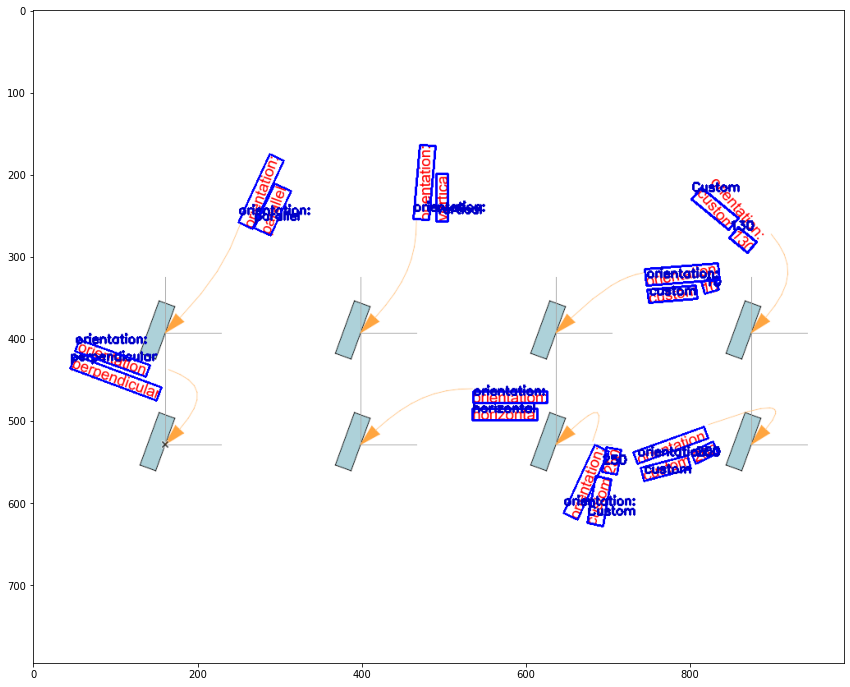

In [306]:
filename = f'testfiles/{filenames[img_idx]}'

img = cv2.imread(filename)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# ret, img = cv2.threshold(img, 250, 255,cv2.THRESH_BINARY,cv2.THRESH_OTSU) #imgf contains Binary image
# plt.imshow(img)
height, width = img.shape[:2]
centerX, centerY = (width // 2, height // 2)

rrects = []
scores = []
texts = []
for angle in range(-45,45,5):               
    result = all_res[angle]

    for i in range(0, len(result["text"])):
        x = result["left"][i]
        y = result["top"][i]

        w = result["width"][i]
        h = result["height"][i]

        text = result["text"][i]
        conf = result["conf"][i]

        rect_center_x = (2*x+w)//2
        rect_center_y = (2*y+h)//2
        qx, qy = rotate((centerX, centerY),(rect_center_x, rect_center_y), math.radians(angle))
        rrect = ((int(qx),int(qy)), (w,h), angle)
        rrects.append(rrect)
        scores.append(conf)
        texts.append(text)

nms_res = nms.rboxes(rrects, scores, nms_algorithm=nms.felzenszwalb.nms)   
filtered_rrects = [rrects[i] for i in nms_res]
filtered_texts = [texts[i] for i in nms_res]
filtered_scores = [scores[i] for i in nms_res]
for rrect, text, conf in zip(filtered_rrects, filtered_texts, filtered_scores): 
    box = cv2.boxPoints(rrect) # cv2.cv.BoxPoints(rect) for OpenCV <3.x
    box = np.int0(box)
    cv2.drawContours(img,[box],0,(0,0,255),2)  
    # cv2.rectangle(img, (int(qx), int(qy)), (int(qx2), int(qy2)), (0, 255, 0), 2)
    # cv2.putText(img, text, (int(qx), int(qy) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)
    # cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img, text, (box[0][0], box[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)
    print(text, conf)
        
plt.figure(figsize=(20,12))
plt.imshow(img)

# OpenCV + Tesseract

In [186]:
def correct_skew(image, delta=10, limit=360):
    def determine_score(arr, angle):
        data = inter.rotate(arr, angle, reshape=False, order=0)
        histogram = np.sum(data, axis=1, dtype=float)
        score = np.sum((histogram[1:] - histogram[:-1]) ** 2, dtype=float)
        return histogram, score

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1] 

    scores = []
    angles = np.arange(-limit, limit + delta, delta)
    for angle in angles:
        histogram, score = determine_score(thresh, angle)
        scores.append(score)

    best_angle = angles[scores.index(max(scores))]

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, best_angle, 1.0)
    corrected = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, \
            borderMode=cv2.BORDER_REPLICATE)

    return best_angle, corrected

C:\Users\kajud\AppData\Local\Temp/ipykernel_16000/2375065038.py:18: RuntimeWarning: invalid value encountered in divide
  enhanced = gray / dilated
C:\Users\kajud\AppData\Local\Temp/ipykernel_16000/2375065038.py:65: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


19.916406631469727
68.96248626708984
19.916406631469727
19.983104705810547
38.571250915527344
19.983104705810547
19.98310661315918
20.185802459716797
17.429861068725586
81.08507537841797
49.9697380065918
16.22019386291504
90.0


<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

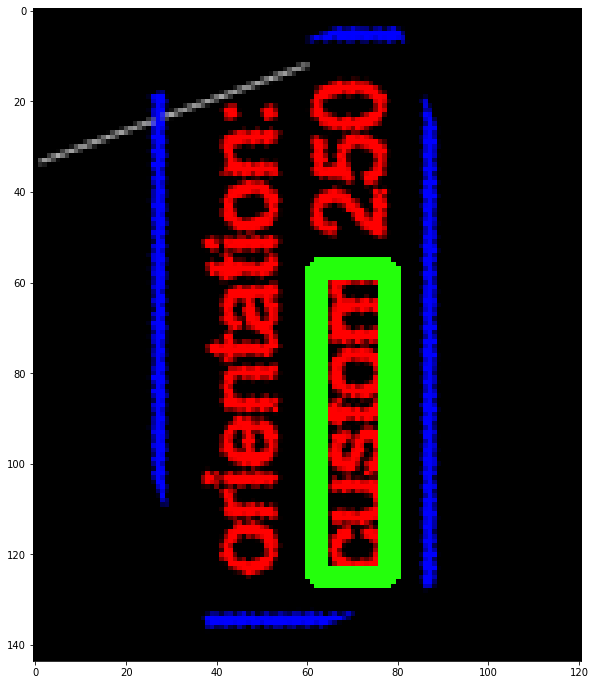

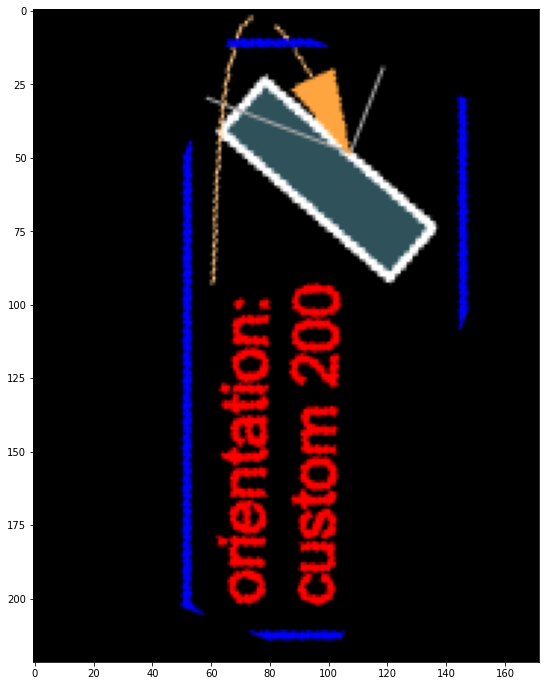

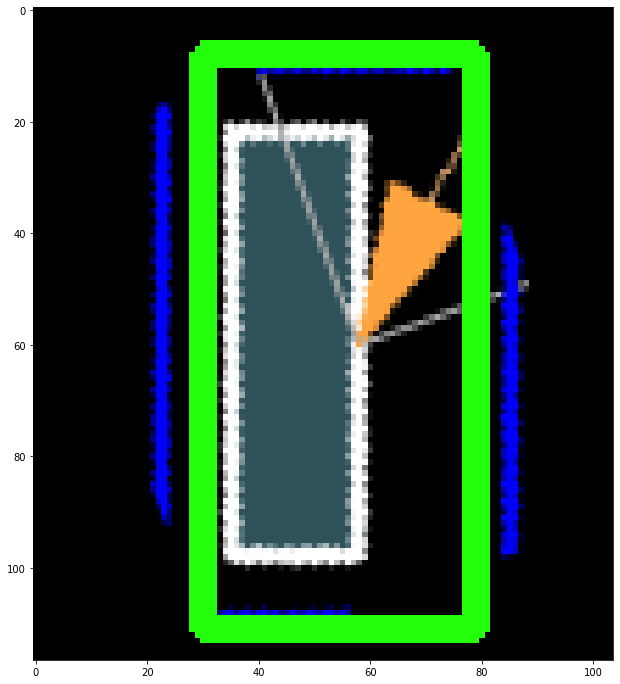

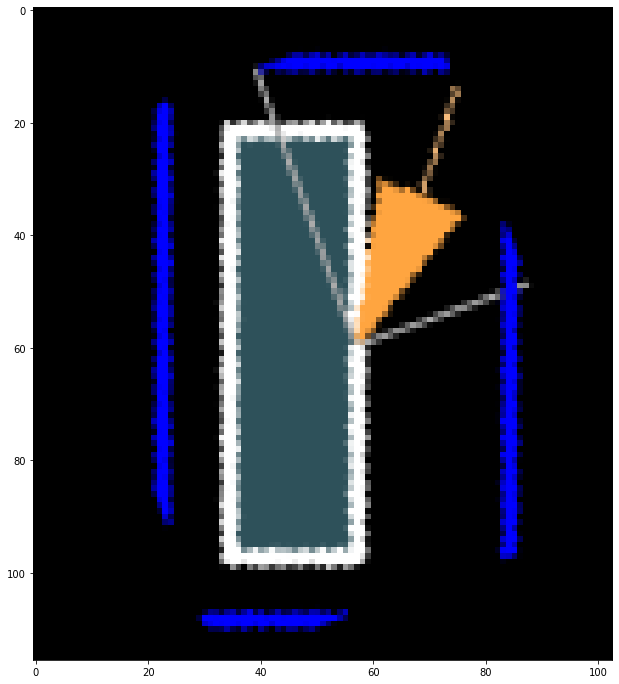

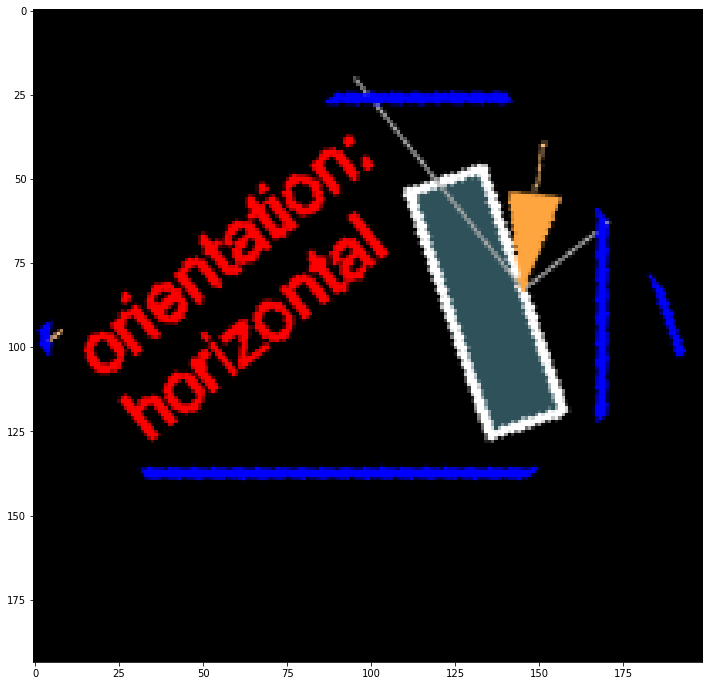

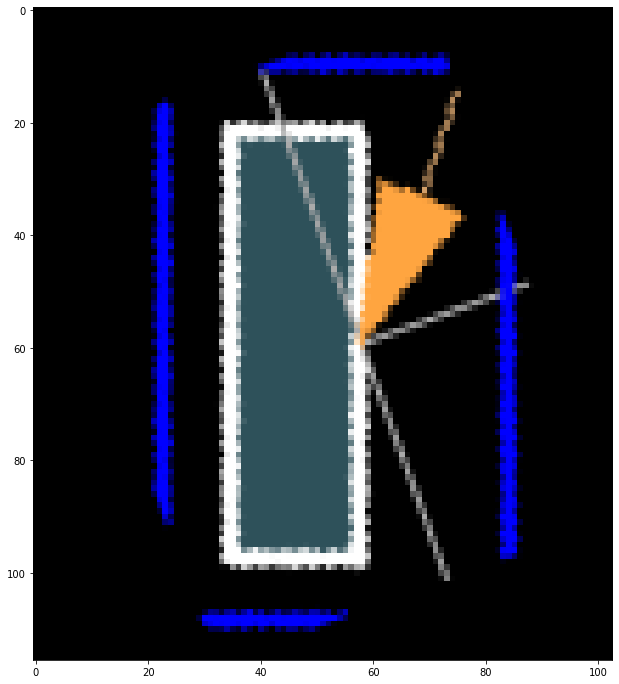

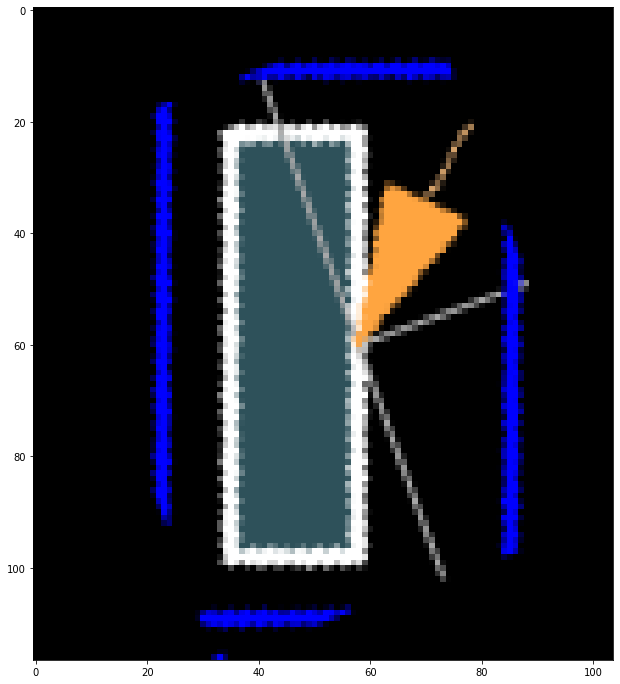

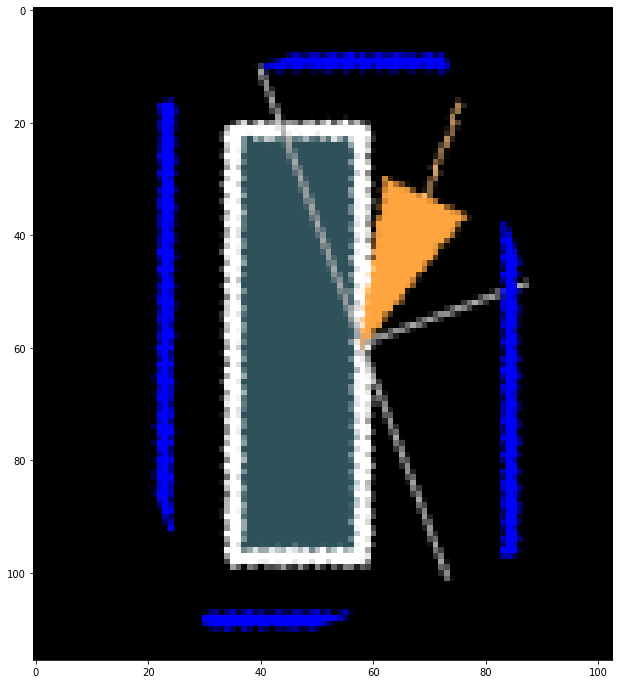

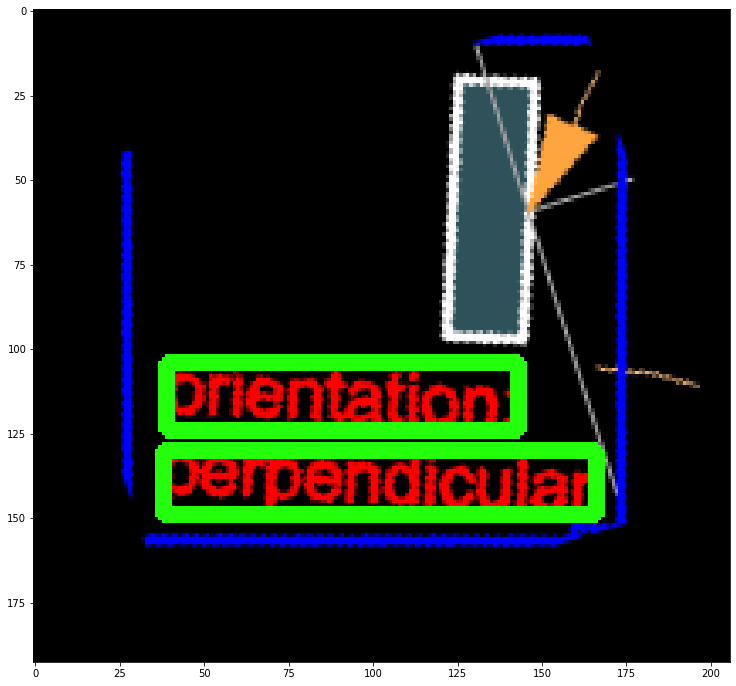

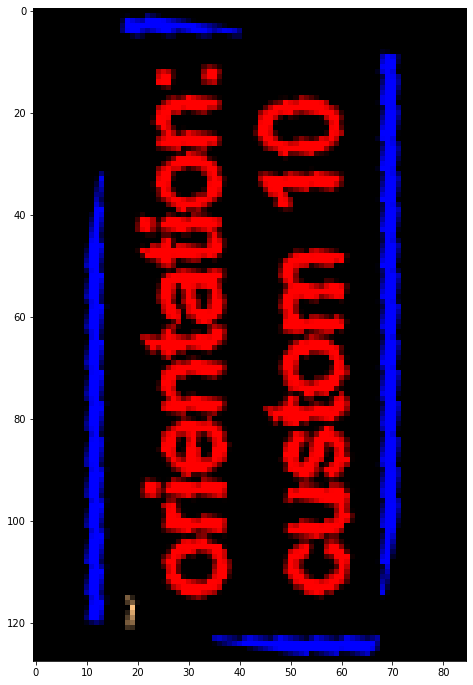

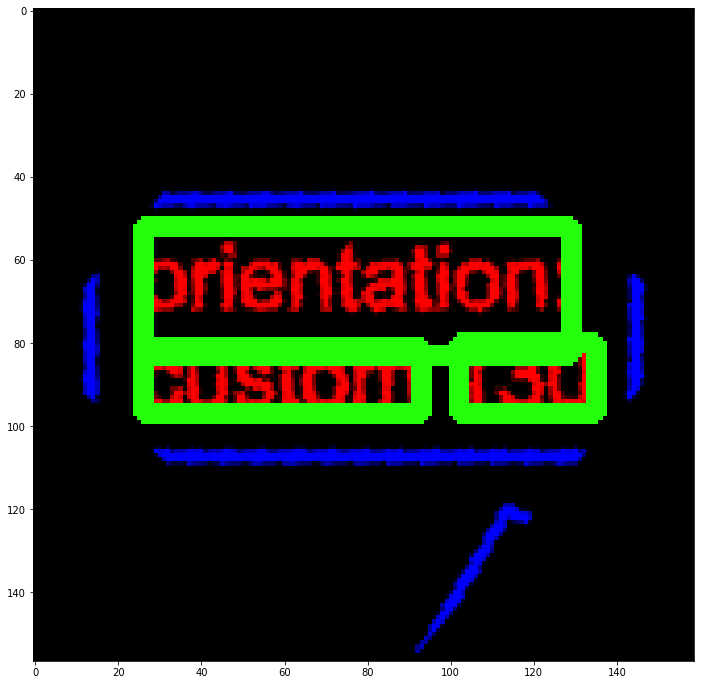

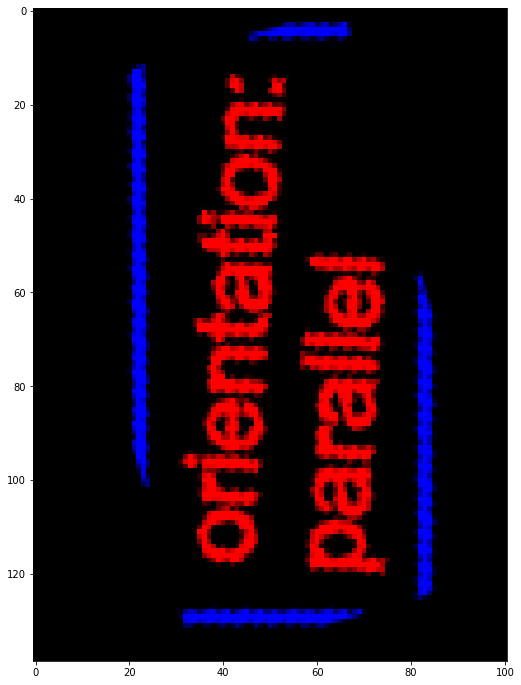

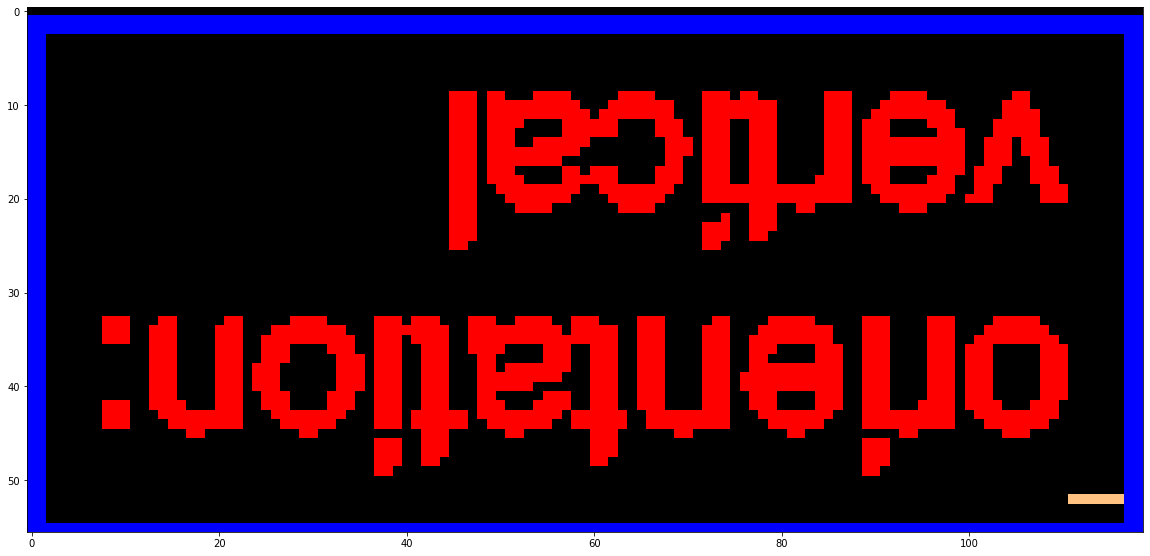

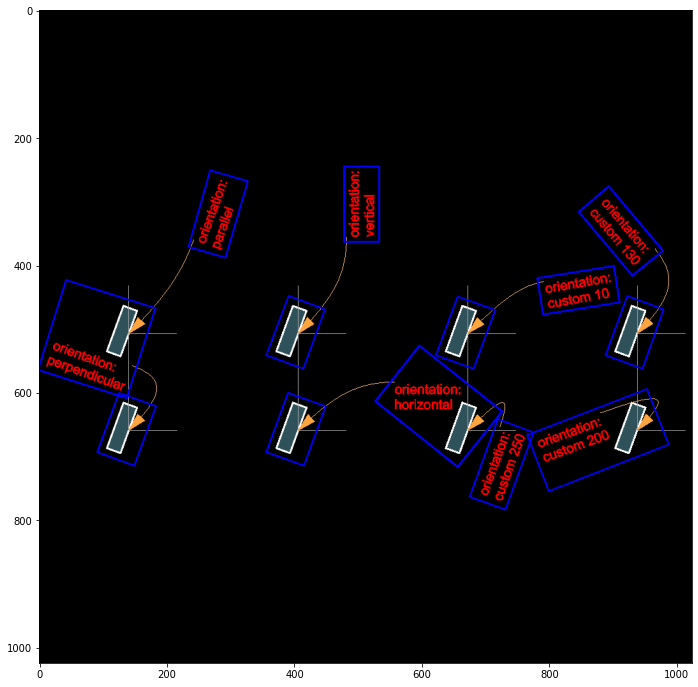

In [223]:
import cv2
plt.figure(figsize=(20,12))
# Load image, grayscale, Gaussian blur, adaptive threshold
# for i in range(0,10):
filename = f'testfiles/{filenames[-6]}'
image = cv2.imread(filename)
# image = cv2.bitwise_not(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

brightness = np.mean(gray)
threshold_C = 20

if brightness < 100:

    morph_kernel = np.ones((5,5))
    dilated = cv2.dilate(gray, kernel=morph_kernel)
    textmask = (dilated >= 0.15)
    enhanced = gray / dilated
    enhanced[~textmask] = gray[~textmask]
    output = 1- enhanced
    gray = output * 255

    threshold_C = 40
blur = cv2.GaussianBlur(gray.astype(np.uint8), (9,9), 0)
# plt.imshow(blur)
thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,21,threshold_C)

# results = pytesseract.image_to_data(image, output_type=Output.DICT)
# for i in range(0, len(results["text"])):
#     x = results["left"][i]
#     y = results["top"][i]

#     w = results["width"][i]
#     h = results["height"][i]

#     text = results["text"][i]
#     conf = int(results["conf"][i])

#     if conf > 70:
#         text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
#         if text != "" and len(text) > 1:
#             cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
#             cv2.putText(image, text, (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 200), 2)

plt.figure(figsize=(20,12))
# plt.imshow(image)
# Dilate to combine adjacent text contours
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
dilate = cv2.dilate(thresh, kernel, iterations=4)
plt.figure(figsize=(20,12))
# plt.imshow(dilate)
# Find contours, highlight text areas, and extract ROIs
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

ROI_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > 1000:
        x,y,w,h = cv2.boundingRect(c)
        minAreaRect = cv2.minAreaRect(c)
        angle = minAreaRect[-1]
        print(angle)
        box = cv2.boxPoints(minAreaRect) # cv2.cv.BoxPoints(rect) for OpenCV <3.x
        box = np.int0(box)
        cv2.drawContours(image,[box],0,(0,0,255),2)
        # cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 3)
        ROI = copy.deepcopy(image[y:y+h, x:x+w])

        rotated = imutils.rotate_bound(ROI, angle=-angle)
    
        # cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        # ROI_number += 1
        # angle, ROI_corrected = correct_skew(ROI)
        # ROI = cv2.resize(ROI, (ROI.shape[0]*40, ROI.shape[1]*40))
        results = pytesseract.image_to_data(rotated, output_type=Output.DICT)
        # print(ROI.shape)
        
        # print(results_osd)
        for i in range(0, len(results["text"])):
            x = results["left"][i]
            y = results["top"][i]

            w = results["width"][i]
            h = results["height"][i]

            text = results["text"][i]
            conf = int(results["conf"][i])

            if conf > 70:
                text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
                if text != "" and len(text) > 1:
                    cv2.rectangle(rotated, (x, y), (x + w, y + h), (36,255,12), 3)
        
        plt.figure(figsize=(20,12))
        plt.imshow(rotated)

plt.figure(figsize=(20,12))
plt.imshow(image)

# MSER text detector

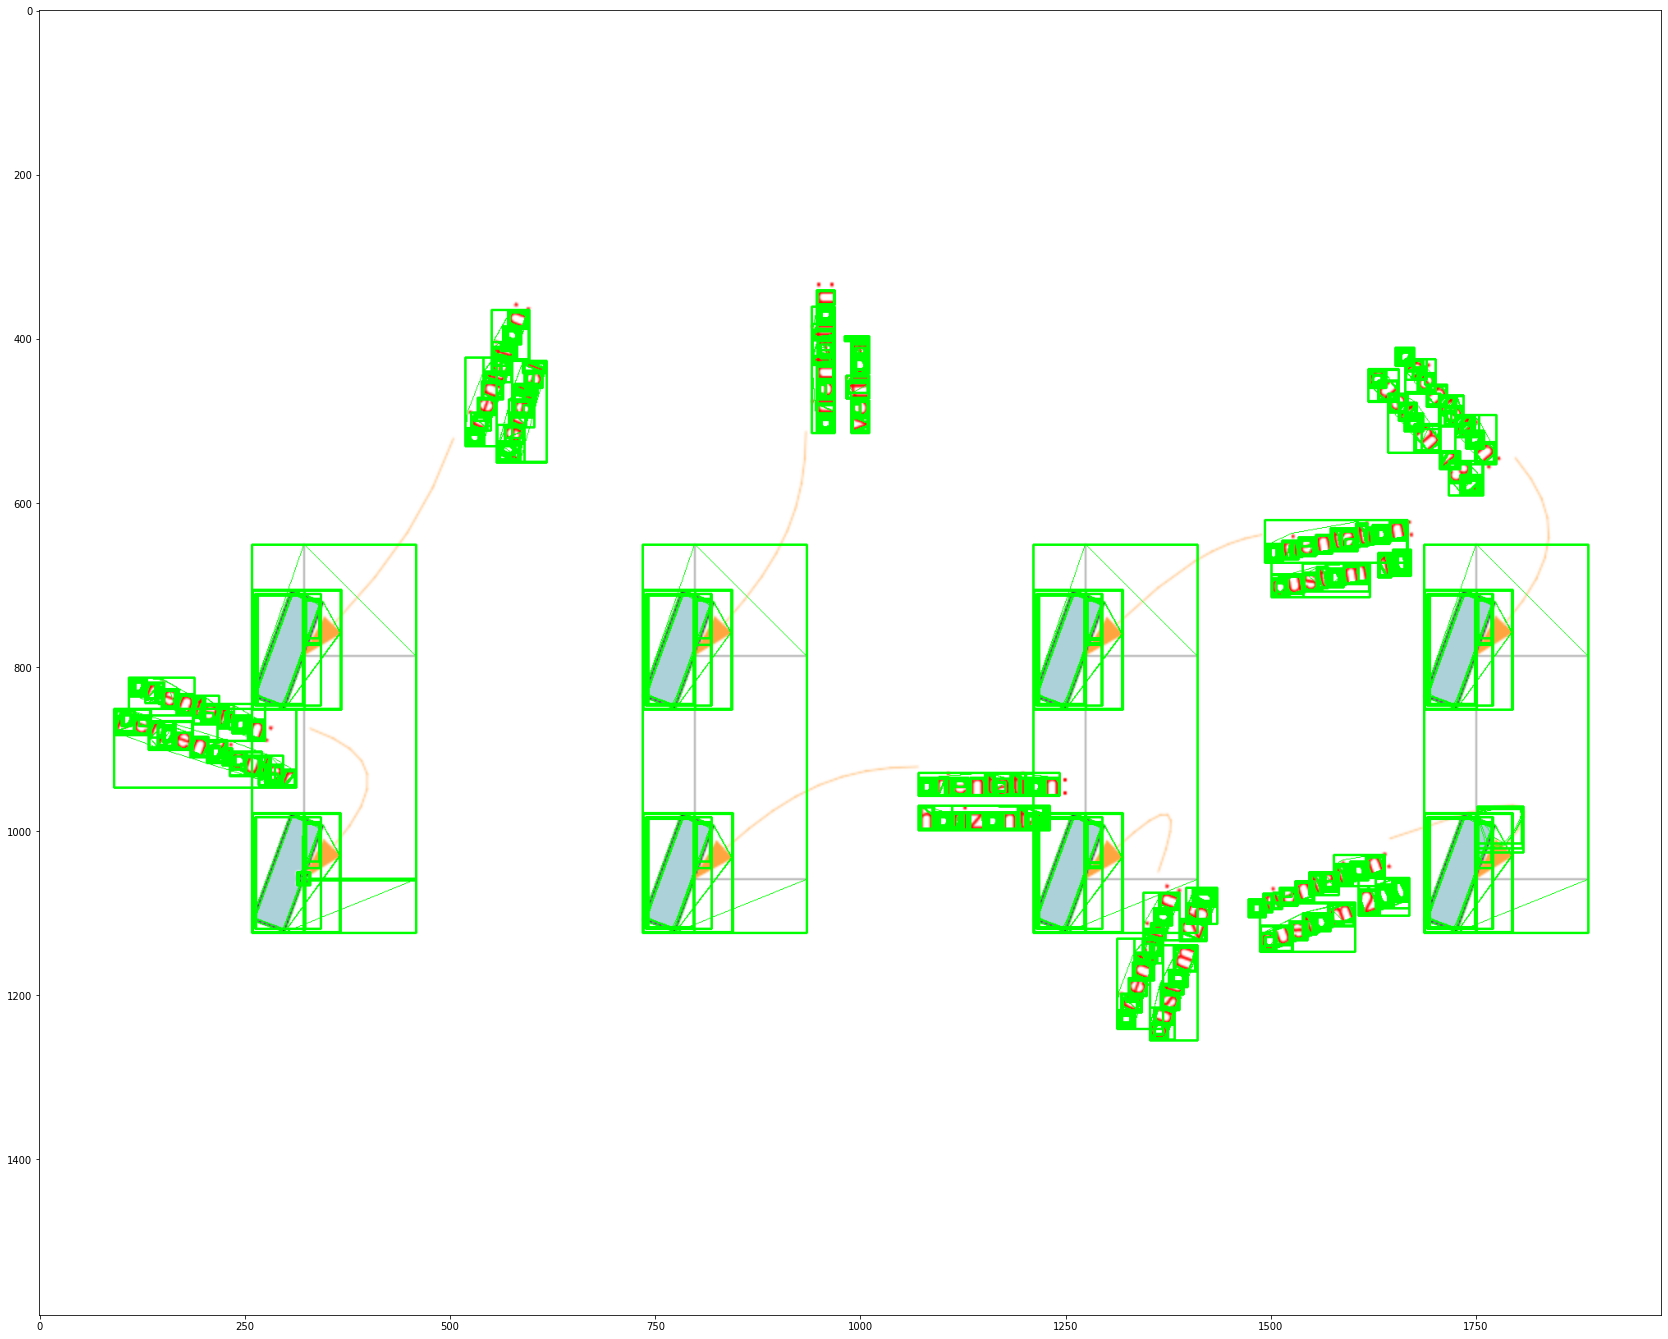

In [58]:
filename = f'testfiles/{filenames[-30]}'

img = cv2.imread(filename)
mser = cv2.MSER_create()

#Resize the image so that MSER can work better
img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()

regions = mser.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions[0]]
cv2.polylines(vis, hulls, 1, (0,255,0)) 
rects = []
for h in hulls:
    # rect = cv2.minAreaRect(h)
    # rects.append([rect[0][0], rect[0][1], rect[1][0], rect[1][1], rect[2]])
    # box = cv2.boxPoints(rect)
    # box = [[min()], 
    #        [], 
    #        [], 
    #        []]
    x,y,w,h = cv2.boundingRect(h)
    vis = cv2.rectangle(vis,(x,y),(x+w,y+h),(0,255,0),2)
    
# scores = [1.0]*len(rects)

# result = softnms_rotate_cpu(np.array(rects), scores, 0.1)

# box = np.int0(box)
# cv2.drawContours(vis, [box], 0, (0, 255, 0),1)

plt.figure(figsize=(40,24))
plt.imshow(vis)

# EAST Detector

In [57]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression

def east_detect(image):
    layerNames = [
    	"feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"]
    
    orig = image.copy()
    
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    (H, W) = image.shape[:2]
    
    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (1600, 1600)
    
    rW = W / float(newW)
    rH = H / float(newH)
    
    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))
    
    (H, W) = image.shape[:2]
    
    net = cv2.dnn.readNet("frozen_east_text_detection.pb")
    
    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
    	(123.68, 116.78, 103.94), swapRB=True, crop=False)
    
    start = time.time()
    
    net.setInput(blob)
    
    (scores, geometry) = net.forward(layerNames)
    
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
    
        for x in range(0, numCols):
    		# if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.7:
                continue
    		# compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])

    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
    	# scale the bounding box coordinates based on the respective
    	# ratios
    	startX = int(startX * rW)
    	startY = int(startY * rH)
    	endX = int(endX * rW)
    	endY = int(endY * rH)
    	# draw the bounding box on the image
    	cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    
    print(time.time() - start)
    return orig

filename = f'testfiles/{filenames[-30]}'
image = cv2.imread(filename)

out_image = east_detect(image)

cv2.imwrite("sample_output.jpg", out_image)

2.8209919929504395


True